<h1>Machine Learning Project 1 - PLA</h1>
<p>Joshua John and Liora Wachsstock</p>

We generated points using the random.randint() python library, which has a random uniform discrete distribution. We assigned a positive value to the point if it was above the y = x line, and a negative value if it was below it. If the data was to be non-linearly separable, then around 10% of the time we switched the point's value.

Special things we did: We used the pocket algorithm in our PLA function. This means we kept track of the solution which has the least number of misclassified points, and at the end of the specified number of passes, we returned the best line that the alogrithm found so far.

<h2> Useful Functions

<h4>Generate Data</h4>

In [1]:
import random
import time

random.seed(time.time())

def generate_data(size, linearly_separable=True):
    data = [[0 for x in range(2)] for y in range(size)] 

    num_pos, num_neg = 0, 0
    
    for i in range(size):

        # Create random data point
        data[i][0] = random.randint(1,100)
        data[i][1] = random.randint(1,100)
            
        # Make sure there are equal amounts in each class
        while(num_pos >= (size / 2) and data[i][0] < data[i][1]):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100) 
        while(num_neg >= (size / 2) and data[i][0] >= data[i][1]):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Point's position relative to x = y line determines value        
        if (data[i][0] < data[i][1]):
            data[i].append(1)
            num_pos += 1
        else:
            data[i].append(-1)
            num_neg += 1

        # Create non-linearly separable data by switching up the value 10% of the time
        # as long as a class is not full
        if (not linearly_separable and random.randint(1,10) % 10 == 0 and num_pos < (size / 2) and num_neg < (size / 2)):
            data[i][2] *= -1
            num_pos = num_pos + (1 if data[i][2] == 1 else -1)
            num_neg = num_neg + (1 if data[i][2] == -1 else -1)
            
    return data

<h4>Get the number of misclassifed points</h4>

In [2]:
import numpy as np
def num_missclassified_points(w, x, y):
    missed_points = []
    signs = np.sign(np.dot(x,w)) 
    for i in range(len(x)):
        if signs[i] != y[i]:
            missed_points.append(i)
    return len(missed_points)

<h4>PLA Algorithm</h4>

In [3]:
import numpy as np
def pla(x, y, passes, step_size=1, w=[0,0,0]):
    
    num_updates = 0 #keep track of updates
    num_missed_points = len(x) #assume it starts with them all missclassified
    min_error_result = w #keep track of the min error case for non-linearly separable data
    
    for c in range(passes):
        updated = False
        for i in range(len(x)):
            if y[i] * np.dot(w, x[i]) <= 0:
                update = [step_size * y[i] * point for point in x[i]]
                w = [sum(i) for i in zip(*[w,update])] #returns a vector of the sums of corresponding values in each vector (w and update) 
                
                updated = True
                num_updates += 1
                
                #check for the number of misclassified points and keep track of the min error
                if num_missclassified_points(w, x, y) < num_missed_points:
                    num_missed_points = num_missclassified_points(w, x, y)
                    min_error_result = w
        
        if not updated:
            break
    
    if not updated:
        print("First solution found: " , w)
    else:
        print("No perfect solution found, best solution found is ", min_error_result)
        w = min_error_result #return best solution found
    
    return [w, num_updates, c + 1]
                    

<h4>Order Data Function</h4>

In [4]:
def order(data):
    ordered_data = []
    for i in range(len(data)):
        if data[i][2] > 0:
            ordered_data.append(data[i])
            
    for i in range(len(data)):
        if data[i][2] <= 0:
            ordered_data.append(data[i])
            
    return ordered_data

<h4>Separate Data</h4>

In [5]:
def sep_data(data):
    #separate the points from values for sake of pla
    values, points = [],[]
    for i in range(len(data)):
        values.append(data[i][2])
        points.append([1, data[i][0], data[i][1]]) #1 is neeeded as the first component before the points, per PLA
    
    return [points, values]

<h4>Plot and Print Data</h4>

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def accuracy(weights, data):
    points, values = sep_data(data)
    return (float(num_missclassified_points(weights, points, values)) / len(data)) * 100

def line_string(weights):
    return 'y = ('+ str(-weights[0]) + ' + ' + str(-weights[1]) + 'x)/' + str(weights[2])

def print_stats(train_ls, test_ls, weights, step, final_weights, total_updates, iterations, train_accuracy, test_accuracy):
    print('1. We generated the points using the python library random.randint() for both x and y coordinates,')
    print('   which has a random uniform distribution. We then assigned a value based on the points position relative')
    print('   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.')
    print('    (https://docs.python.org/3/library/random.html)')
    print('2. Linearly separable training data :', train_ls)
    print('3. Linearly separable test data:', test_ls)
    print('4. Initial learning weights:', weights, 'and step size constant:', step)
    print('5.', line_string(final_weights))
    print('6. Total times the weights were updated:', total_updates)
    print('7. Total iterations:', iterations)
    print('8. Final missclassification error on training data: ' + str(train_accuracy) + '%')
    print('   Final missclassification error on test data: '+ str(test_accuracy) + '%')

def print_conclusions(base_case, case_I, case_II, case_III):
    print("Base case used w = [0,0,0], step_size constant = 1, and points were kept in their random order.")
    print("The resulting line was", line_string(base_case))
    print('')
    print("I. w = [1,2,3], step_size = 1, and the points were kept in their random order:") 
    print("   Resulting line:", line_string(case_I))
    print("   Compared to base case result:", line_string(base_case))
    print('')
    print("II. w = [0,0,0], step_size = 2, and the points were kept in their random order:") 
    print("   Resulting line:", line_string(case_II))
    print("   Compared to base case result:", line_string(base_case))
    print('')
    print("III. w = [0,0,0], step_size = 1, and the points were grouped according to class (PLA dealt with one and then the other):") 
    print("   Resulting line:", line_string(case_III))
    print("   Compared to base case result:", line_string(base_case))
    
 
def plot_data(data, graph_title, weights=[]):
    
    df = pd.DataFrame(data, columns=("X", "Y", "value"))
    df.plot.scatter(x="X", y="Y", c="value", cmap='viridis', title=graph_title)

    # weights[0] + weights[1]*(x) + weights[2]*(y) = 0
    if weights:
        x = np.array(range(100))
        y = ((-1*weights[0]) - weights[1]*x) / weights[2]
        plt.plot(x, y) 

<h3><u> Generate Test Data:</u></h3>

In [7]:
test_data = generate_data(30, linearly_separable=False)
test_points, test_values = sep_data(test_data)

<h2><u>Linearly Separable Data Set</u></h2>

<h3>Generate Training Data:

In [8]:
tr_data_ls = generate_data(50)

#separate for sake of PLA
tr_points, tr_values = sep_data(tr_data_ls)

<h4>Base case (w = [0,0,0], step_size = 1, ordered = false):

First solution found:  [0, -135, 136]
1. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
2. Linearly separable training data : True
3. Linearly separable test data: False
4. Initial learning weights: [0, 0, 0] and step size constant: 1
5. y = (0 + 135x)/136
6. Total times the weights were updated: 8
7. Total iterations: 2
8. Final missclassification error on training data: 0.0%
   Final missclassification error on test data: 6.666666666666667%


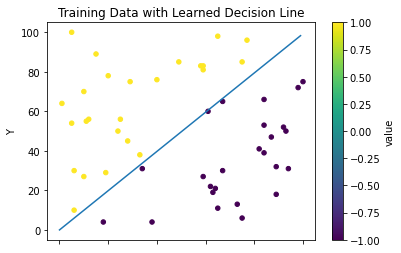

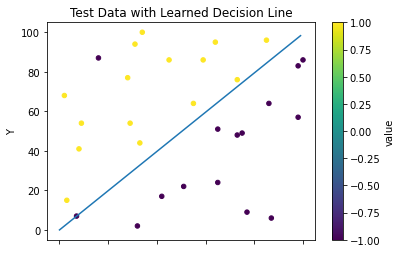

In [9]:
#Variables
passes = 100
step_size = 1
w = [0,0,0]

#Run PLA on training Data
result, updates, iterations = pla(tr_points, tr_values, passes, step_size, w)

plot_data(tr_data_ls, 'Training Data with Learned Decision Line', result)
plot_data(test_data, 'Test Data with Learned Decision Line', result)
print_stats(True, False, w, step_size, result, updates, iterations, accuracy(result, tr_data_ls), accuracy(result, test_data))

#save result
base_case = result

<h4>Case I. where w = [1,2,3] step_size = 1, ordered = false

First solution found:  [2, -242, 228]
1. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
2. Linearly separable training data : True
3. Linearly separable test data: False
4. Initial learning weights: [1, 2, 3] and step size constant: 1
5. y = (-2 + 242x)/228
6. Total times the weights were updated: 23
7. Total iterations: 5
8. Final missclassification error on training data: 0.0%
   Final missclassification error on test data: 6.666666666666667%


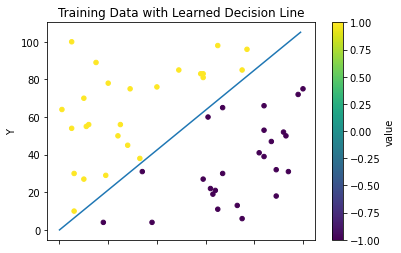

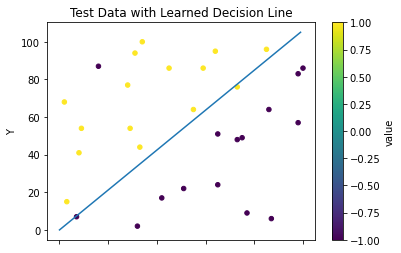

In [10]:
#Variables
passes = 100
step_size = 1
w = [1,2,3]

#Run PLA on training Data
result, updates, iterations = pla(tr_points, tr_values, passes, step_size, w)

plot_data(tr_data_ls, 'Training Data with Learned Decision Line', result)
plot_data(test_data, 'Test Data with Learned Decision Line', result)
print_stats(True, False, w, step_size, result, updates, iterations, accuracy(result, tr_data_ls), accuracy(result, test_data))

# Save result 
case_I = result

<h4> Case II. where w = [0,0,0] step_size = 2, ordered = false

First solution found:  [0, -540, 544]
1. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
2. Linearly separable training data : True
3. Linearly separable test data: False
4. Initial learning weights: [0, 0, 0] and step size constant: 4
5. y = (0 + 540x)/544
6. Total times the weights were updated: 8
7. Total iterations: 2
8. Final missclassification error on training data: 0.0%
   Final missclassification error on test data: 6.666666666666667%


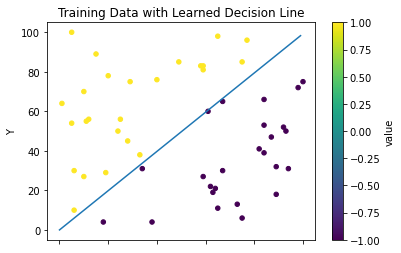

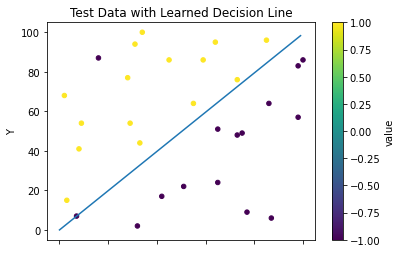

In [11]:
#Variables
passes = 100
step_size = 4
w = [0,0,0]

#Run PLA
result, updates, iterations = pla(tr_points, tr_values, passes, step_size, w)

plot_data(tr_data_ls, 'Training Data with Learned Decision Line', result)
plot_data(test_data, 'Test Data with Learned Decision Line', result)
print_stats(True, False, w, step_size, result, updates, iterations, accuracy(result, tr_data_ls), accuracy(result, test_data))

# Save result 
case_II = result

<h4>Case III. where w = [0,0,0] step_size = 1, ordered = True

First solution found:  [2, -114, 112]
1. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
2. Linearly separable training data : True
3. Linearly separable test data: False
4. Initial learning weights: [0, 0, 0] and step size constant: 1
5. y = (-2 + 114x)/112
6. Total times the weights were updated: 14
7. Total iterations: 7
8. Final missclassification error on training data: 0.0%
   Final missclassification error on test data: 3.3333333333333335%


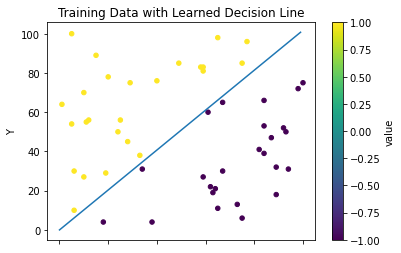

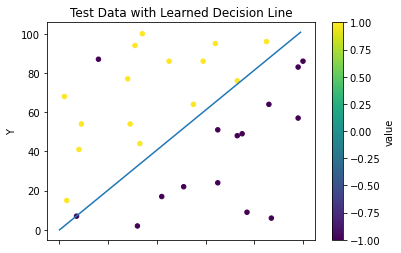

In [12]:
#Variables
passes = 100
step_size = 1
w = [0,0,0]

# order
ordered_points, ordered_values = sep_data(order(tr_data_ls))

#Run PLA
result, updates, iterations = pla(ordered_points, ordered_values, passes, step_size, w)

plot_data(tr_data_ls, 'Training Data with Learned Decision Line', result)
plot_data(test_data, 'Test Data with Learned Decision Line', result)
print_stats(True, False, w, step_size, result, updates, iterations, accuracy(result, tr_data_ls), accuracy(result, test_data))

#save result
case_III = result


<h3>Conclusions:</h3>

In [13]:
print_conclusions(base_case, case_I, case_II, case_III)

Base case used w = [0,0,0], step_size constant = 1, and points were kept in their random order.
The resulting line was y = (0 + 135x)/136

I. w = [1,2,3], step_size = 1, and the points were kept in their random order:
   Resulting line: y = (-2 + 242x)/228
   Compared to base case result: y = (0 + 135x)/136

II. w = [0,0,0], step_size = 2, and the points were kept in their random order:
   Resulting line: y = (0 + 540x)/544
   Compared to base case result: y = (0 + 135x)/136

III. w = [0,0,0], step_size = 1, and the points were grouped according to class (PLA dealt with one and then the other):
   Resulting line: y = (-2 + 114x)/112
   Compared to base case result: y = (0 + 135x)/136


<h2><u>Non-Linearly Separable Dataset</u>

<h3>Generate Training Data:

In [14]:
tr_data_nls = generate_data(50, linearly_separable=False)

#separate for sake of PLA
tr_points_nls, tr_values_nls = sep_data(tr_data_nls)

<h4>Base case (w = [0,0,0], step_size = 1, ordered = false):

No perfect solution found, best solution found is  [1, -79, 84]
1. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
2. Linearly separable training data : False
3. Linearly separable test data: False
4. Initial learning weights: [0, 0, 0] and step size constant: 1
5. y = (-1 + 79x)/84
6. Total times the weights were updated: 2010
7. Total iterations: 100
8. Final missclassification error on training data: 14.000000000000002%
   Final missclassification error on test data: 6.666666666666667%


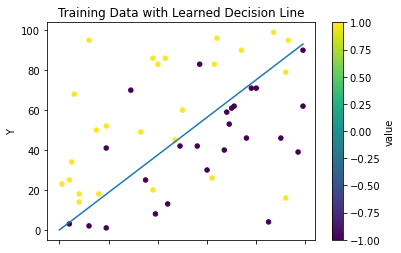

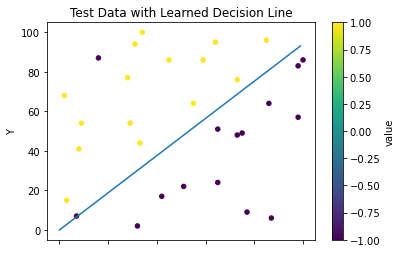

In [15]:
#Variables
passes = 100
step_size = 1
w = [0,0,0]

#Run PLA on training Data
result, updates, iterations = pla(tr_points_nls, tr_values_nls, passes, step_size, w)

plot_data(tr_data_nls, 'Training Data with Learned Decision Line', result)
plot_data(test_data, 'Test Data with Learned Decision Line', result)
print_stats(False, False, w, step_size, result, updates, iterations, accuracy(result, tr_data_nls), accuracy(result, test_data))

# Save result 
base_case = result

<h4>Case I. where w = [1,2,3], step_size = 1, ordered = False

No perfect solution found, best solution found is  [18, -125, 136]
1. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
2. Linearly separable training data : False
3. Linearly separable test data: False
4. Initial learning weights: [1, 2, 3] and step size constant: 1
5. y = (-18 + 125x)/136
6. Total times the weights were updated: 1991
7. Total iterations: 100
8. Final missclassification error on training data: 14.000000000000002%
   Final missclassification error on test data: 6.666666666666667%


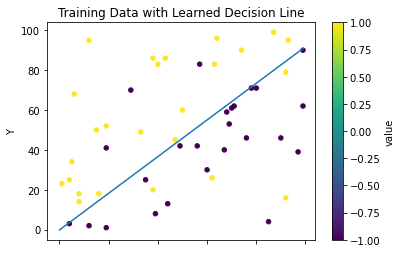

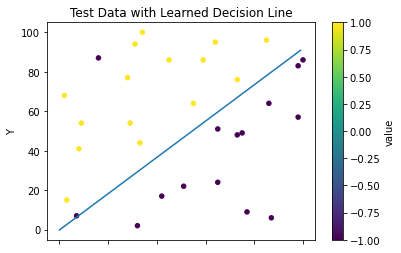

In [16]:
#Variables
passes = 100
step_size = 1
w = [1,2,3]

#Run PLA
result, updates, iterations = pla(tr_points_nls, tr_values_nls, passes, step_size, w)

plot_data(tr_data_nls, 'Training Data with Learned Decision Line', result)
plot_data(test_data, 'Test Data with Learned Decision Line', result)
print_stats(False, False, w, step_size, result, updates, iterations, accuracy(result, tr_data_nls), accuracy(result, test_data))

# Save result 
case_I = result

<h4> Case II. where w = [0,0,0] step_size = 2, ordered = False

No perfect solution found, best solution found is  [2, -158, 168]
1. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
2. Linearly separable training data : False
3. Linearly separable test data: False
4. Initial learning weights: [0, 0, 0] and step size constant: 2
5. y = (-2 + 158x)/168
6. Total times the weights were updated: 2010
7. Total iterations: 100
8. Final missclassification error on training data: 14.000000000000002%
   Final missclassification error on test data: 6.666666666666667%


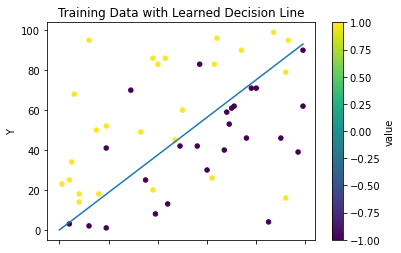

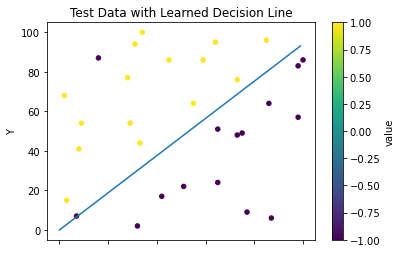

In [17]:
#Variables
passes = 100
step_size = 2
w = [0,0,0]

#run PLA
result, updates, iterations = pla(tr_points_nls, tr_values_nls, passes, step_size, w)

plot_data(tr_data_nls, 'Training Data with Learned Decision Line', result)
plot_data(test_data, 'Test Data with Learned Decision Line', result)
print_stats(False, False, w, step_size, result, updates, iterations, accuracy(result, tr_data_nls), accuracy(result, test_data))

#save result
case_II = result

<h4> Case III. where w = [0,0,0] step_size = 1, ordered = True

No perfect solution found, best solution found is  [2, -96, 105]
1. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
2. Linearly separable training data : False
3. Linearly separable test data: False
4. Initial learning weights: [0, 0, 0] and step size constant: 1
5. y = (-2 + 96x)/105
6. Total times the weights were updated: 766
7. Total iterations: 100
8. Final missclassification error on training data: 14.000000000000002%
   Final missclassification error on test data: 6.666666666666667%


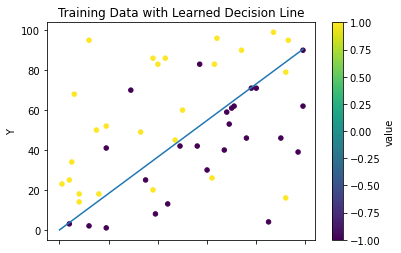

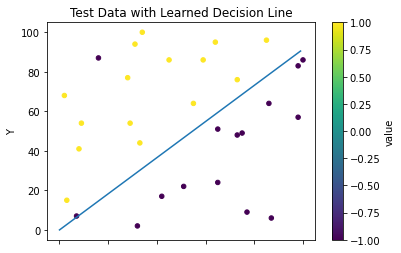

In [18]:
#Variables
passes = 100
step_size = 1
w = [0,0,0]

# Order
ordered_points, ordered_values = sep_data(order(tr_data_nls))

#Run PLA
result, updates, iterations = pla(ordered_points, ordered_values, passes, step_size, w)

plot_data(tr_data_nls, 'Training Data with Learned Decision Line', result)
plot_data(test_data, 'Test Data with Learned Decision Line', result)
print_stats(False, False, w, step_size, result, updates, iterations, accuracy(result, tr_data_nls), accuracy(result, test_data))

#save result
case_III = result


<h3>Conclusions:</h3>

In [19]:
print_conclusions(base_case, case_I, case_II, case_III)

Base case used w = [0,0,0], step_size constant = 1, and points were kept in their random order.
The resulting line was y = (-1 + 79x)/84

I. w = [1,2,3], step_size = 1, and the points were kept in their random order:
   Resulting line: y = (-18 + 125x)/136
   Compared to base case result: y = (-1 + 79x)/84

II. w = [0,0,0], step_size = 2, and the points were kept in their random order:
   Resulting line: y = (-2 + 158x)/168
   Compared to base case result: y = (-1 + 79x)/84

III. w = [0,0,0], step_size = 1, and the points were grouped according to class (PLA dealt with one and then the other):
   Resulting line: y = (-2 + 96x)/105
   Compared to base case result: y = (-1 + 79x)/84


<h3><u>Interesting Notes:</u></h3> 
<p>For both linearly separable and non-linearly separable data, changing the step size seems to produce the same line, but the coefficients are scaled up by a factor of the step size. So making the step size 2 scales the coefficients up by 2.</p>
<p>In some runs of the PLA algorithm, accuracy was improved by changing up the weights, step size, or order of the weights, and in other runs the accuracy remained the same or got worse. </p>